In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
from graphplotlib import *

def code_to_name(code):
    code = int(code)
    if code == 1:
        return "L1"
    elif code == 21:
        return "SGL"
    else:
        return "None"
    
def filter_data(data, *keys): # keys = [column, value]
    data = data.copy()
    for key in keys:
        if key[1][0] == '~':
            data = data[data[key[0]] != key[1][1:]]
            
        else:
            data = data[data[key[0]] == key[1]]
    return data

# Supple plots

(3, 15)


,model_id,cv_idx,input,hidden,lambda,where,ratio,f1_1,train_2,precision_1,recall_1,training_time,test_loss,accuracy,regularizer
0,1,2.0,None,None,0e+00,TOP,0.05,21.888,24.0,23.050,21.396,11.3732,0.369023,94.312,"(None,None)"
1,2,2.0,None,None,0e+00,TOP,0.10,25.760,49.0,29.176,23.492,7.0996,0.364519,95.108,"(None,None)"
2,3,2.0,None,None,0e+00,TOP,0.20,29.638,99.0,31.818,28.140,6.2234,0.322730,95.046,"(None,None)"


(72, 15)


,model_id,cv_idx,input,hidden,lambda,where,ratio,f1_1,train_2,precision_1,recall_1,training_time,test_loss,accuracy,regularizer
3,11,2.0,SGL,None,1e-03,TOP,0.05,25.390,24.0,26.168,25.118,7.1138,0.336032,94.504,"(SGL,None)"
4,12,2.0,SGL,None,1e-03,TOP,0.10,27.432,49.0,29.402,26.512,7.9956,0.327818,94.860,"(SGL,None)"
5,13,2.0,SGL,None,1e-03,TOP,0.20,29.052,99.0,32.314,26.744,7.4676,0.325094,95.222,"(SGL,None)"
6,21,2.0,SGL,SGL,1e-03,TOP,0.05,22.768,24.0,23.456,22.326,9.4450,0.342711,94.346,"(SGL,SGL)"
7,22,2.0,SGL,SGL,1e-03,TOP,0.10,28.120,49.0,29.038,27.440,8.5558,0.354681,94.736,"(SGL,SGL)"


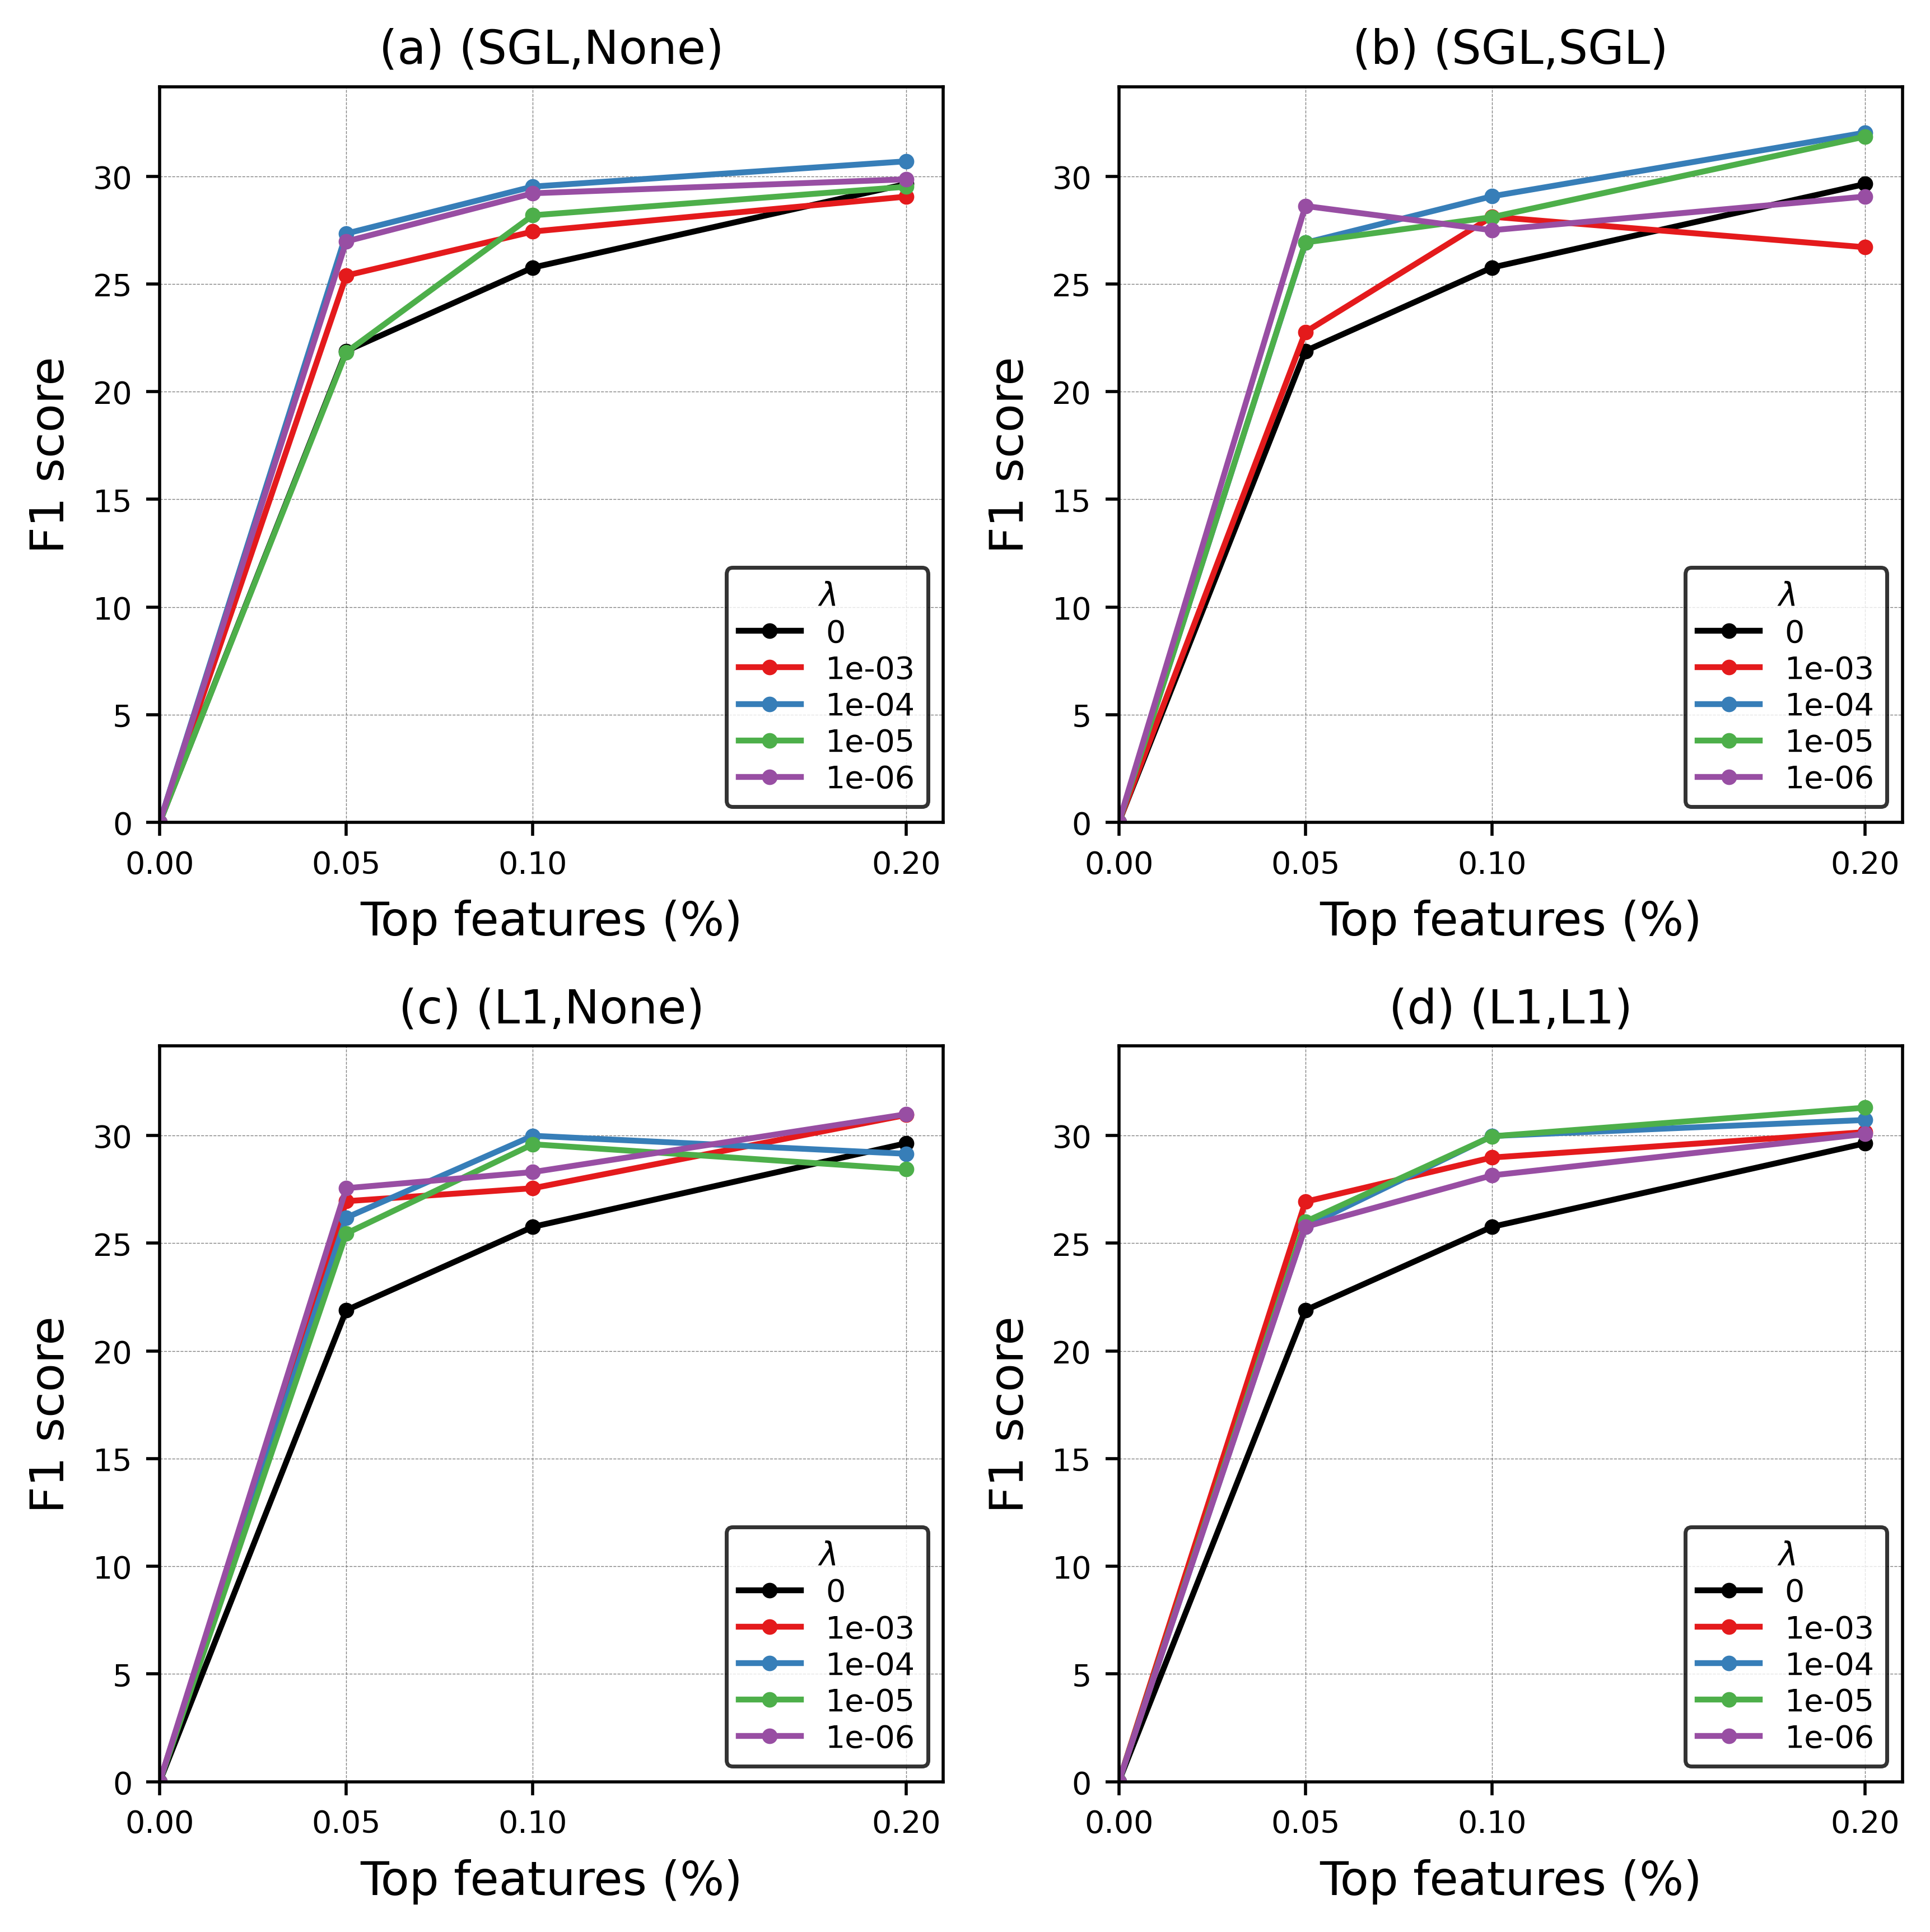

In [3]:
data = pd.read_csv('./figures/top vs bottom mean 3.csv')
data['lambda'] = data['lambda'].apply(lambda x : f'{x:.0e}')
data['input'] = data['input'].apply(code_to_name)
data['hidden'] = data['hidden'].apply(code_to_name)
data['where'] = data['where'].apply(lambda x: 'TOP' if int(x) == 1 else 'BOTTOM')
data['regularizer'] = data.apply(lambda x: f"({x['input']},{x['hidden']})", axis=1)

base_data = filter_data(data, 
                        ('regularizer', '(None,None)'),
                        ('where', 'TOP'))

main_data = filter_data(data, 
            ('lambda', '~0e+00'),
            ('where', 'TOP'))

columns = main_data.columns
zeros = pd.DataFrame([[0 for _ in range(len(columns))]], columns = columns)

print(base_data.shape)
display(base_data.head(5))
print(main_data.shape)
display(main_data.head(5))

### Figure Config ###
plt.figure(figsize=(7, 7), facecolor = 'white', dpi=500)
title  = 'Incremental feature addition'
x, xlabel = 'ratio', 'Top features (%)'
y, ylabel = 'f1_1', 'F1 score'

xlim = (0, )
# xlim = (0 - 0.001, 0.20 + 0.001)

ymin = main_data[y].min()
ymax = main_data[y].max()
# ylim = ()
ylim = (0, ymax * 1.05)

### Plot Data ###
subkey = 'regularizer'
subitems = ['(SGL,None)', '(SGL,SGL)', '(L1,None)', '(L1,L1)']
subidx = ['a', 'b', 'c', 'd']
huekey = 'lambda'
hueitems = ['1e-03', '1e-04', '1e-05', '1e-06']
for s, sub in enumerate(subitems):
    plt.subplot(2, 2, s + 1)
    
    base_data = pd.concat([zeros, base_data], axis = 0)
    lineplot(base_data, x, y, color = 'k', label='0')
    
    sub_data = main_data[main_data[subkey] == sub]
    for h, hue in enumerate(hueitems):
        hue_data = sub_data[sub_data[huekey] == hue]
        hue_data = pd.concat([zeros, hue_data], axis = 0)
        
        lineplot(hue_data, x, y, label=hue,
                 color = sns.color_palette('Set1')[h])
        
    ### Set Axis and Legend ###
    setaxis(xlabel=xlabel, ylabel=ylabel, title=f'({subidx[s]}) {sub}',
            xlim=xlim, ylim=ylim,
            xticks=hue_data[x].values)
    setlegend(loc='lower right', title = '$\lambda$')
    setgrid()

### Show and Save ###
plt.tight_layout()
plt.savefig(f'./figures/figure_{title} (supple).png')
plt.show()

# Main plot

(15, 16)


,Unnamed: 0,model_id,cv_idx,input,hidden,lambda,where,ratio,f1_1,train_2,precision_1,recall_1,training_time,test_loss,accuracy,regularizer
0,0,1,0,None,None,0e+00,TOP,0.05,18.18,24,17.78,18.60,14.198,0.406631,93.76,"(None,None)"
1,0,1,1,None,None,0e+00,TOP,0.05,15.17,24,18.64,12.79,15.660,0.389295,94.67,"(None,None)"
2,0,1,2,None,None,0e+00,TOP,0.05,22.67,24,26.56,19.77,9.812,0.403938,94.97,"(None,None)"
3,0,1,3,None,None,0e+00,TOP,0.05,20.49,24,17.65,24.42,4.978,0.393920,92.93,"(None,None)"
4,0,1,4,None,None,0e+00,TOP,0.05,32.93,24,34.62,31.40,12.218,0.251329,95.23,"(None,None)"


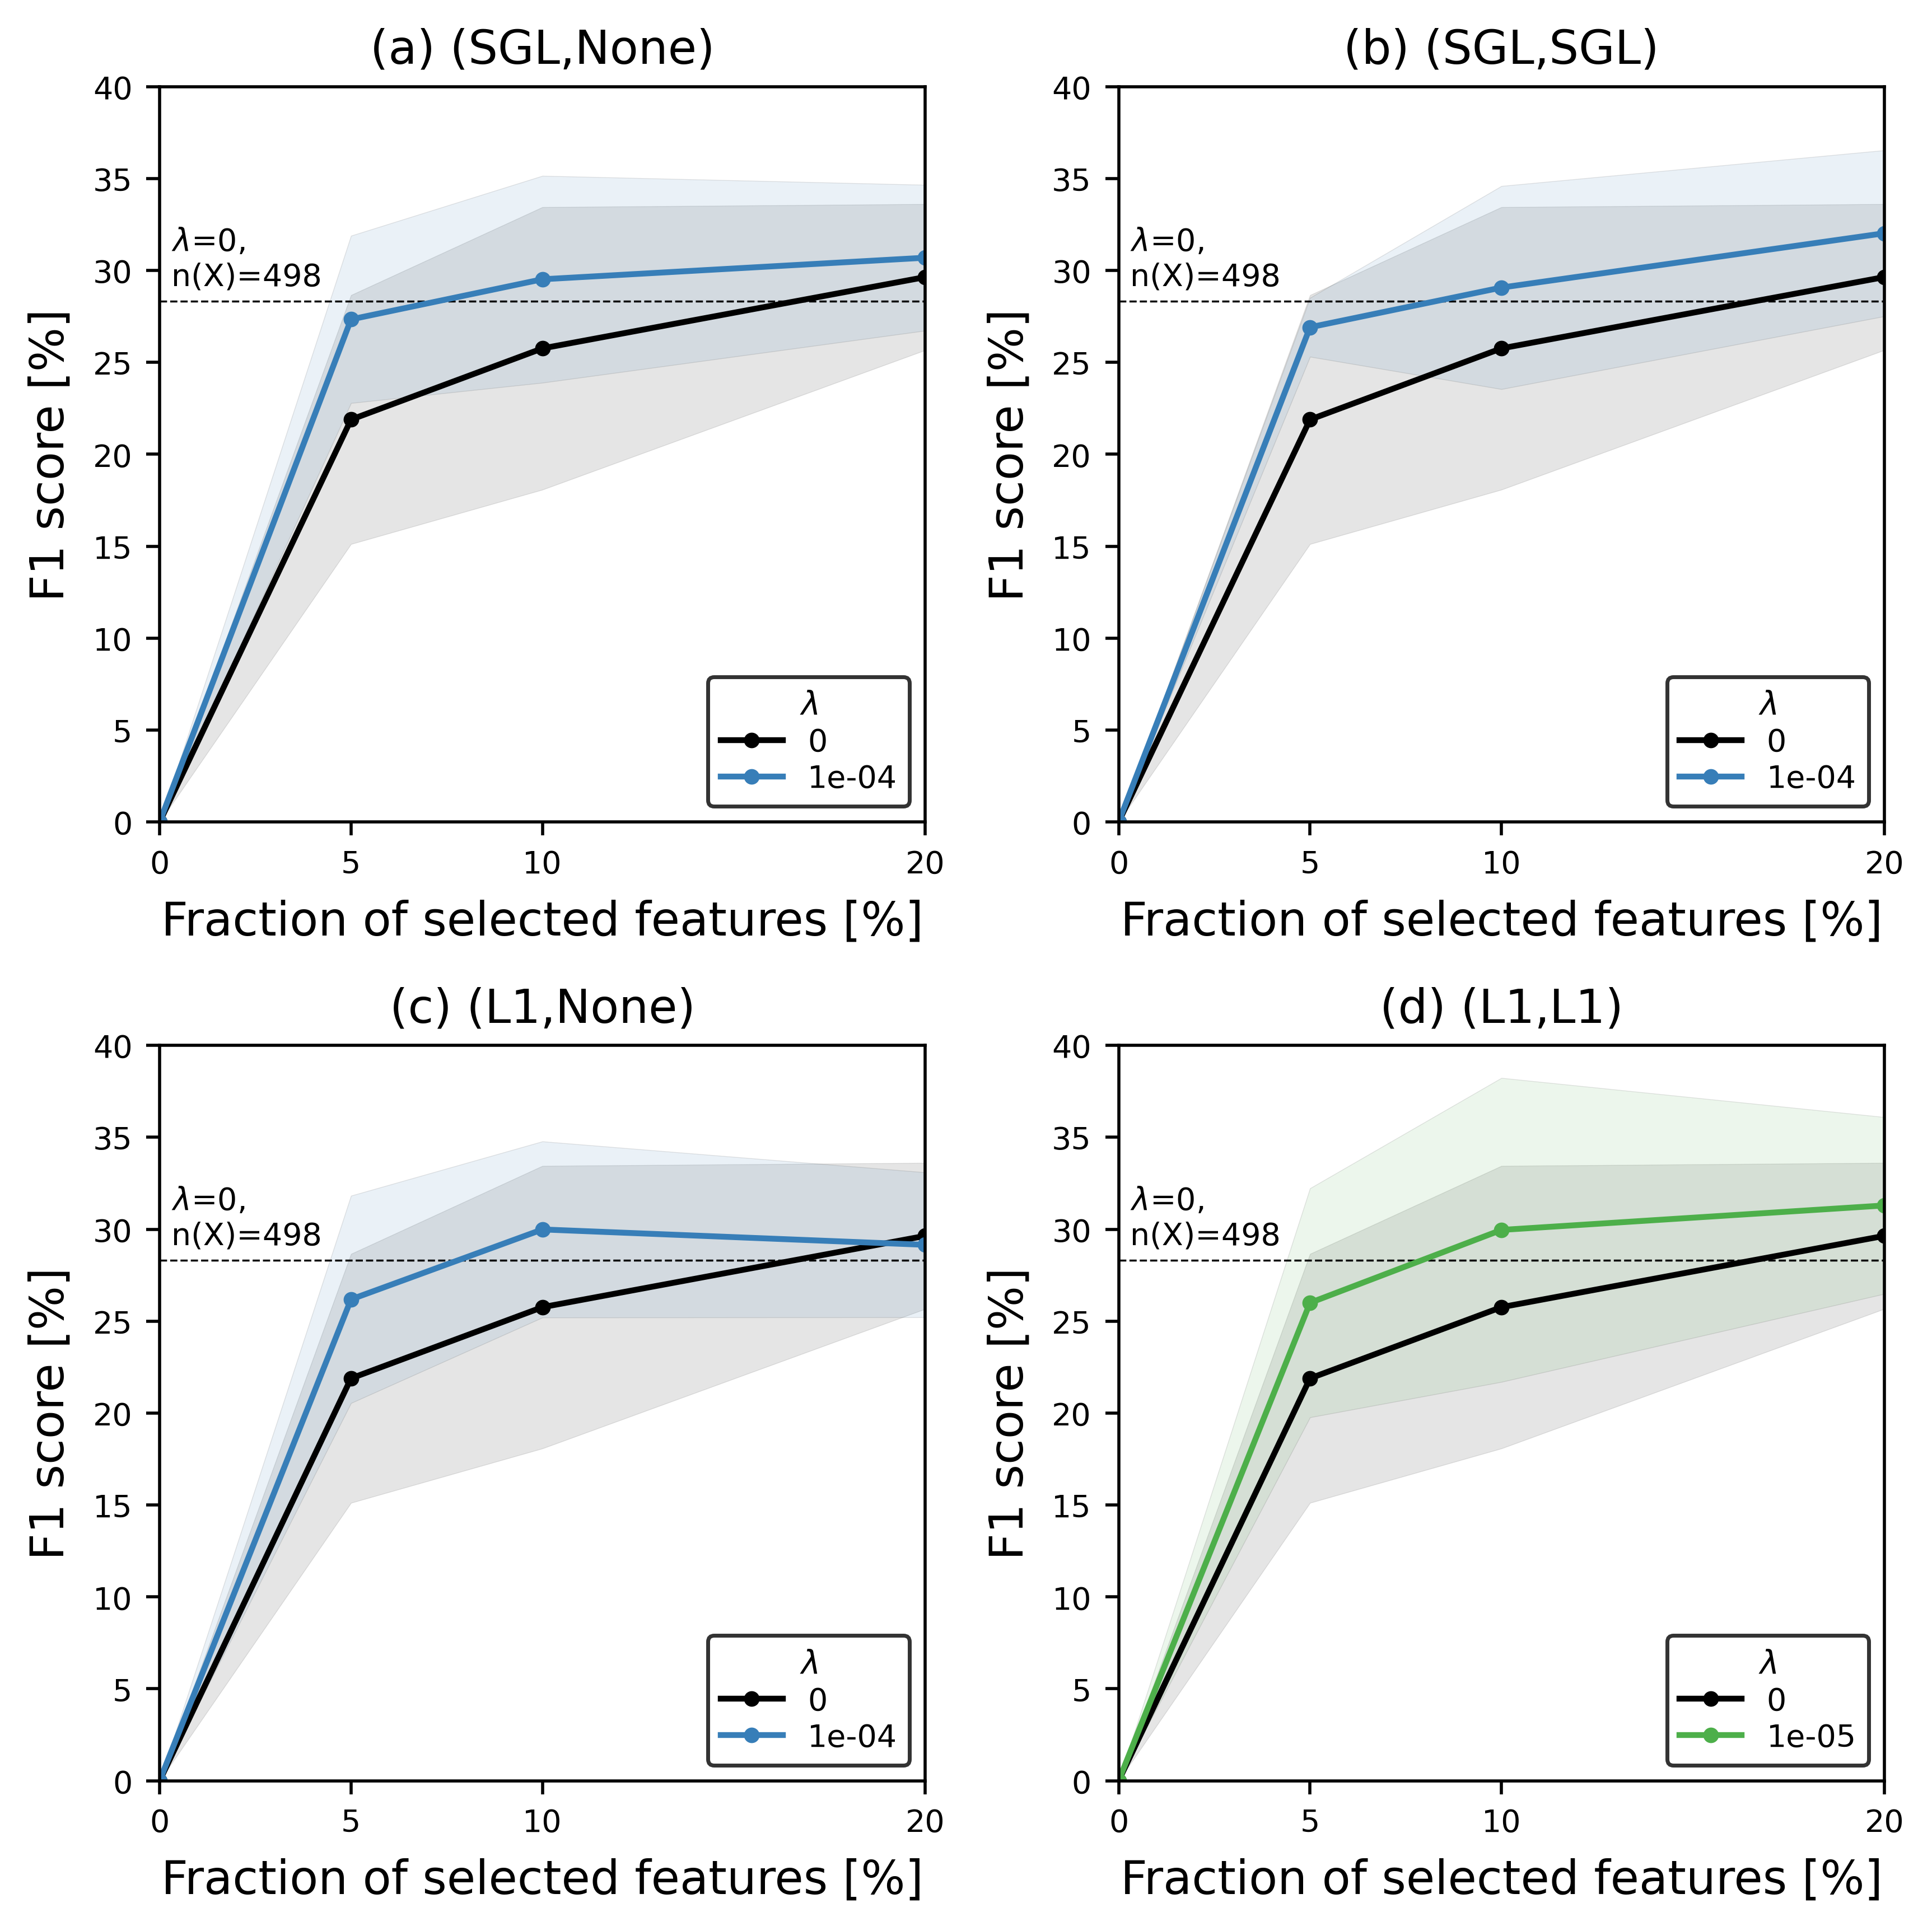

In [7]:
### result ###
best_regularizer = ['(SGL,None)', '(SGL, SGL)', '(L1, None)', '(L1, L1)']

data = pd.read_csv('./figures/top vs bottom 3.csv')
data['lambda'] = data['lambda'].apply(lambda x : f'{x:.0e}')
data['input'] = data['input'].apply(code_to_name)
data['hidden'] = data['hidden'].apply(code_to_name)
data['where'] = data['where'].apply(lambda x: 'TOP' if int(x) == 1 else 'BOTTOM')
data['regularizer'] = data.apply(lambda x: f"({x['input']},{x['hidden']})", axis=1)

base_data = filter_data(data, 
                        ('regularizer', '(None,None)'),
                        ('where', 'TOP')
)

columns = base_data.columns
zeros = pd.DataFrame([[0 for _ in range(len(columns))]], columns = columns)
zeros = pd.concat([zeros for _ in range(5)], axis=0)

print(base_data.shape)
display(base_data.head(5))

### Figure Config ###
plt.figure(figsize=(7, 7), facecolor = 'white', dpi=500)
title  = 'Incremental feature addition'
x, xlabel = 'ratio', 'Fraction of selected features [%]'
y, ylabel = 'f1_1', 'F1 score [%]'

xlim = (0, 0.20)
# xlim = (0 - 0.001, 0.20 + 0.001)

# ymin = data[y].min()
# ymax = data[y].max()
# ylim = (0, ymax * 1.05)
ylim = (0, 40)

### Plot Data ###
subkey = 'regularizer'
subitems = ['(SGL,None)', '(SGL,SGL)', '(L1,None)', '(L1,L1)']
best_lambda = ['1e-04', '1e-04', '1e-04', '1e-05']
subidx = ['a', 'b', 'c', 'd']

base_data = pd.concat([zeros, base_data], axis = 0)
        
def linerrfillplot(data, x, y, color='k', label=None,
                linewidth = 1.5, linestyle = '-', linemarker = 'o', markersize = 3, linealpha = 1,
                errwidth = 0.2, errstyle = '-', erralpha = 0.1):
    data = data.copy()
    mean = data.filter(items=[x,y]).groupby(by=x).mean()[y]
    std  = data.filter(items=[x,y]).groupby(by=x).std()[y]
    assert all(mean.index == std.index), 'index inconsistency'
    
    xticks = mean.index
    mean_values = mean.values
    std_values = std.values
    
    plt.plot(xticks, mean_values, label=label,
             color = color, linewidth=linewidth, linestyle=linestyle, alpha=linealpha, 
             marker=linemarker, markersize=markersize)
    plt.xticks(xticks, labels=[0, 5, 10, 20])
    plt.fill_between(xticks, y1=mean_values - std_values, y2=mean_values + std_values, where=None,
            color = color, edgecolor='k', linewidth = errwidth, linestyle=errstyle, alpha=erralpha)

        
for s, sub in enumerate(subitems):
    colors = sns.color_palette('Set1')
    plt.subplot(2, 2, s + 1)
    l = best_lambda[s]
    
    plt.plot([0, 0.20], [28.32, 28.32], color = 'k', linewidth = 0.5, linestyle = '--')
    plt.text(0.003, 28.32 + 0.5, '$\lambda$=0,\nn(X)=498', fontsize=8, 
             horizontalalignment='left', verticalalignment='bottom')
    
    linerrfillplot(base_data, x, y, color = 'k', label='0')
    main_data = filter_data(data, 
                        (subkey, sub),
                        ('where', 'TOP'),
                        ('lambda', l))

    main_data = pd.concat([zeros, main_data], axis = 0)
    linerrfillplot(main_data, x, y, color = colors[1] if l == '1e-04' else colors[2], label=l)

    ### Set Axis and Legend ###
    setaxis(xlabel=xlabel, ylabel=ylabel, title=f'({subidx[s]}) {sub}',
            xlim=xlim, ylim=ylim,
            )
    setlegend(loc='lower right', title = '$\lambda$')

### Show and Save ###
plt.tight_layout()
plt.savefig(f'./figures/figure_{title} (main).png')
plt.show()

(15, 16)


,Unnamed: 0,model_id,cv_idx,input,hidden,lambda,where,ratio,f1_1,train_2,precision_1,recall_1,training_time,test_loss,accuracy,regularizer
0,0,1,0,None,None,0e+00,TOP,0.05,18.18,24,17.78,18.60,14.198,0.406631,93.76,"(None,None)"
1,0,1,1,None,None,0e+00,TOP,0.05,15.17,24,18.64,12.79,15.660,0.389295,94.67,"(None,None)"
2,0,1,2,None,None,0e+00,TOP,0.05,22.67,24,26.56,19.77,9.812,0.403938,94.97,"(None,None)"
3,0,1,3,None,None,0e+00,TOP,0.05,20.49,24,17.65,24.42,4.978,0.393920,92.93,"(None,None)"
4,0,1,4,None,None,0e+00,TOP,0.05,32.93,24,34.62,31.40,12.218,0.251329,95.23,"(None,None)"


TypeError: agg function failed [how->mean,dtype->object]

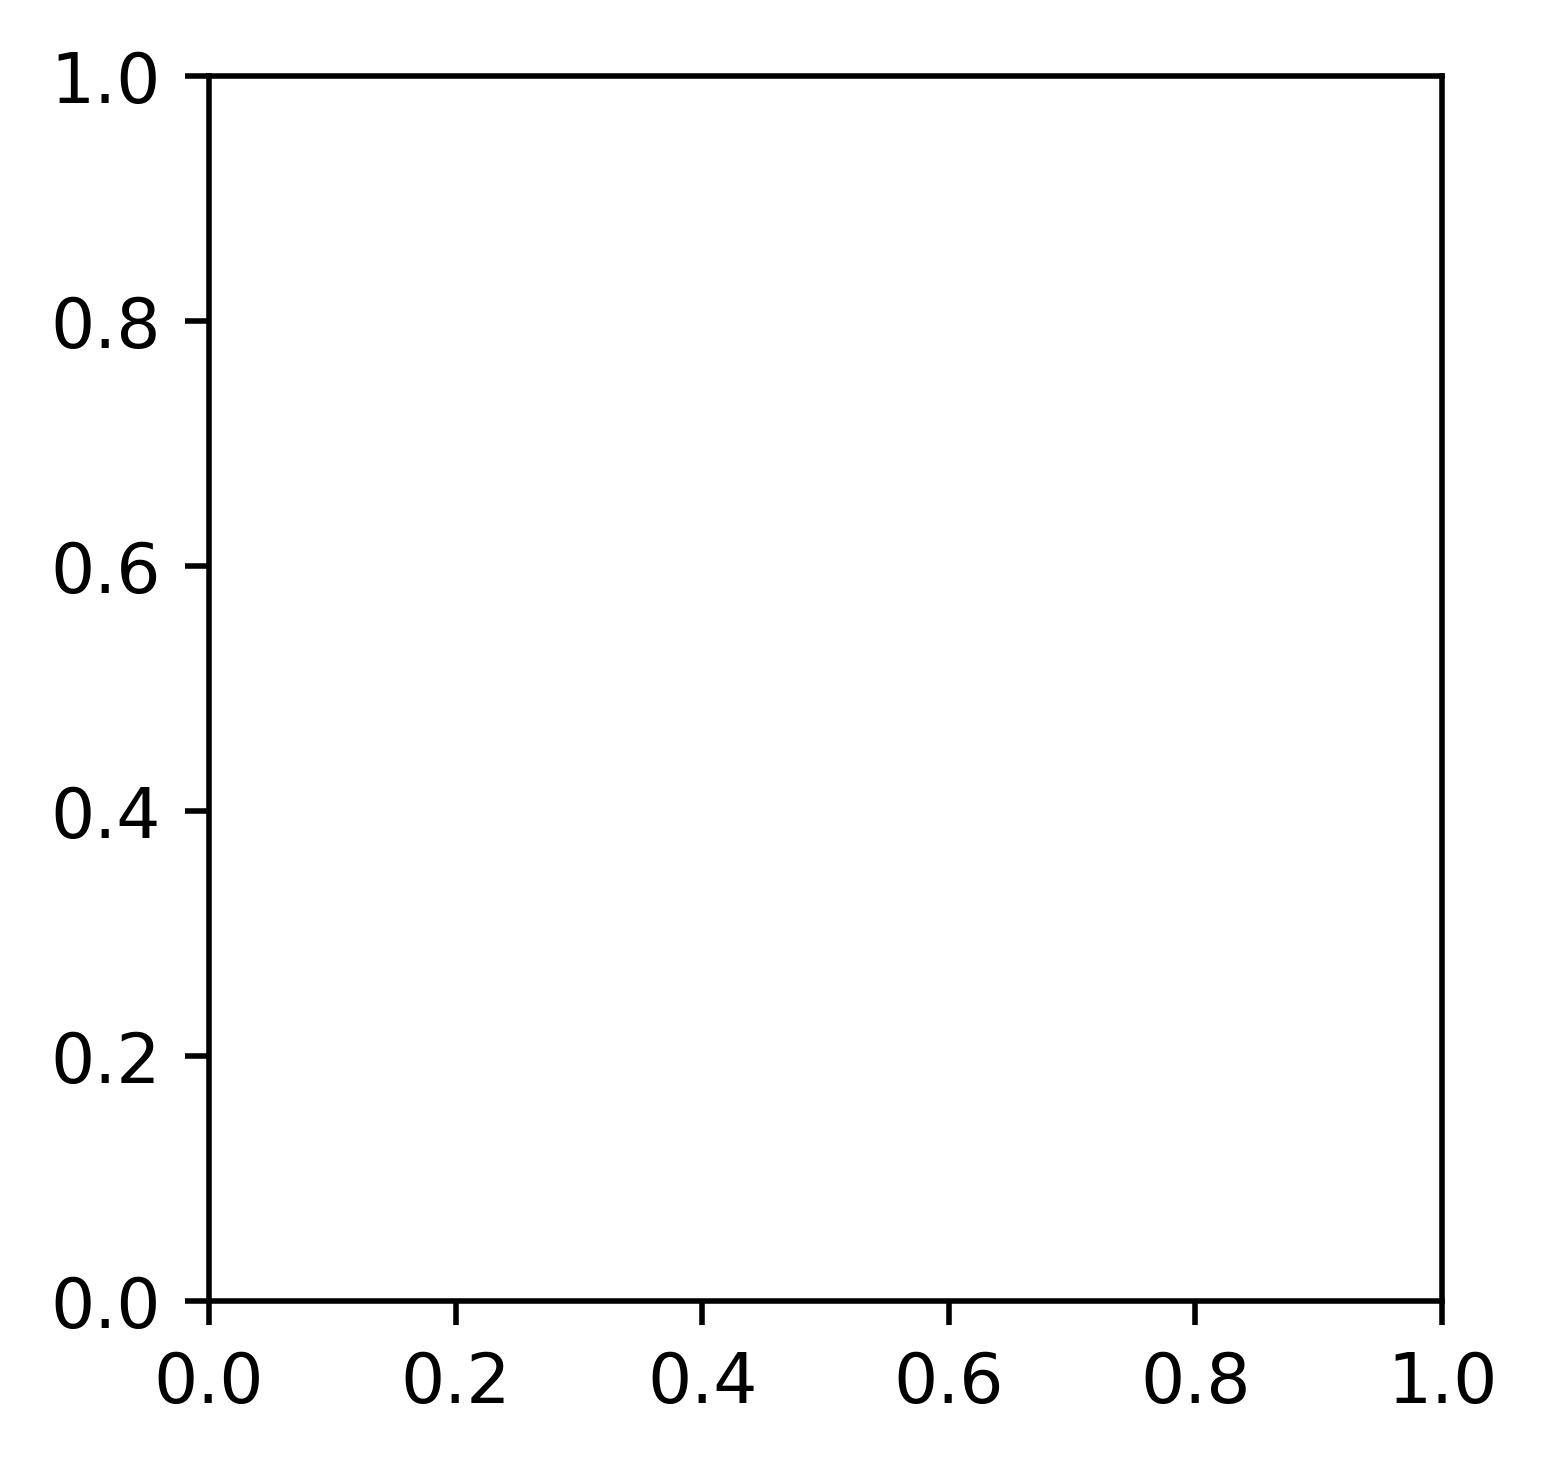

In [5]:
### result ###
best_regularizer = ['(SGL,None)', '(SGL, SGL)', '(L1, None)', '(L1, L1)']

data = pd.read_csv('./figures/top vs bottom 3.csv')
data['lambda'] = data['lambda'].apply(lambda x : f'{x:.0e}')
data['input'] = data['input'].apply(code_to_name)
data['hidden'] = data['hidden'].apply(code_to_name)
data['where'] = data['where'].apply(lambda x: 'TOP' if int(x) == 1 else 'BOTTOM')
data['regularizer'] = data.apply(lambda x: f"({x['input']},{x['hidden']})", axis=1)

base_data = filter_data(data, 
                        ('regularizer', '(None,None)'),
                        ('where', 'TOP')
)

columns = base_data.columns
zeros = pd.DataFrame([[0 for _ in range(len(columns))]], columns = columns)

print(base_data.shape)
display(base_data.head(5))

### Figure Config ###
plt.figure(figsize=(7, 7), facecolor = 'white', dpi=500)
title  = 'Incremental feature addition'
x, xlabel = 'ratio', 'Top features (%)'
y, ylabel = 'f1_1', 'F1 score'

xlim = (0, )
# xlim = (0 - 0.001, 0.20 + 0.001)

# ymin = data[y].min()
# ymax = data[y].max()
# ylim = (0, ymax * 1.05)
ylim = (0, 40)

### Plot Data ###
subkey = 'regularizer'
subitems = ['(SGL,None)', '(SGL,SGL)', '(L1,None)', '(L1,L1)']
best_lambda = ['1e-04', '1e-04', '1e-04', '1e-05']
subidx = ['a', 'b', 'c', 'd']
for s, sub in enumerate(subitems):
    colors = sns.color_palette('Set1')
    plt.subplot(2, 2, s + 1)
    l = best_lambda[s]
    
    base_data = pd.concat([zeros, base_data], axis = 0)
    linerrbarplot(base_data, x, y, color = 'k', label='0')

    main_data = filter_data(data, 
                        (subkey, sub),
                        ('where', 'TOP'),
                        ('lambda', best_lambda[s]))

    main_data = pd.concat([zeros, main_data], axis = 0)
    linerrbarplot(main_data, x, y, color = colors[1] if l == '1e-04' else colors[2], label=l)

    ### Set Axis and Legend ###
    setaxis(xlabel=xlabel, ylabel=ylabel, title=f'({subidx[s]}) {sub}',
            xlim=xlim, ylim=ylim,
            )
    setlegend(loc='lower right', title = '$\lambda$')

### Show and Save ###
plt.tight_layout()
plt.savefig(f'./figures/_figure_{title}.png')
plt.show()